# **Data**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Import the LogisticRegression class from sklearn's linear_model module. This class is used to perform logistic regression, a type of regression analysis used for binary classification.

from sklearn.preprocessing import StandardScaler
# Import the StandardScaler class from sklearn's preprocessing module. This class is used to standardize features by removing the mean and scaling to unit variance, which is often important for many machine learning algorithms to perform well.

In [ ]:
# Import the libraries that we are going to use in the code

import pandas as pd
# Import the pandas library, which is used for data manipulation and analysis. It provides data structures like DataFrames to handle and analyze data efficiently.

import numpy as np
# Import the numpy library, which provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

import matplotlib.pyplot as plt
# Import the pyplot module from matplotlib, a plotting library. This module provides functions for creating a variety of static, animated, and interactive plots and graphs.

import seaborn as sns
# Import the seaborn library, which is built on top of matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [ ]:
# Specify the path where the file of interest is located
path_TELE = rf'/content/drive/MyDrive/Sapienza/Resources/WP2 -TELEMAIA Associazione tra EEG e TELEMONITORING features in Nold e MCI.xlsx'
# Define the file path for the Excel file containing TELE monitoring features data. The path is specified as a raw string (rf) to handle special characters or escape sequences.

path_EEG = rf'/content/drive/MyDrive/Sapienza/Resources/WP2 -TELEMAIA EEG features in Nold e PD con deficit cognitivi.xlsx'
# Define the file path for the Excel file containing EEG features data. The path is specified as a raw string (rf) to handle special characters or escape sequences.

path_MRI = rf'/content/drive/MyDrive/Sapienza/Resources/WP2 -TELEMAIA MRI features in Nold e PD con deficit cognitivi.xlsx'
# Define the file path for the Excel file containing MRI features data. The path is specified as a raw string (rf) to handle special characters or escape sequences.

# Create a variable with the Excel information in a data frame structure
data_tele = pd.read_excel(path_TELE, sheet_name='best')
# Read the specified sheet ('best') from the TELE monitoring features Excel file into a pandas DataFrame named `data_tele`.

data_eeg = pd.read_excel(path_EEG, sheet_name='all')
# Read the specified sheet ('all') from the EEG features Excel file into a pandas DataFrame named `data_eeg`.

data_mri = pd.read_excel(path_MRI, sheet_name='all')
# Read the specified sheet ('all') from the MRI features Excel file into a pandas DataFrame named `data_mri`.

In [ ]:
df = data_eeg
# Assign the DataFrame `data_eeg` to a new variable named `df`.
# This makes it easier to work with `data_eeg` using a shorter variable name.

In [ ]:
# Define a list of brain regions to be used in column mapping.
regions = ['Frontal', 'Central', 'Parietal', 'Occipital', 'Temporal']

# Create a dictionary that maps EEG frequency bands to their respective abbreviations.
bands = {
    'Delta': 'De',    # Delta band abbreviation
    'Theta': 'Th',    # Theta band abbreviation
    'Alpha 1': 'A1',  # Alpha 1 band abbreviation
    'Alpha 2': 'A2',  # Alpha 2 band abbreviation
    'Alpha 3': 'A3',  # Alpha 3 band abbreviation
    'Beta 1': 'B1',   # Beta 1 band abbreviation
    'Beta 2': 'B2',   # Beta 2 band abbreviation
    'Gamma': 'Ga',    # Gamma band abbreviation
}

## Rescale

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance to scale data between 0 and 1
scaler = MinMaxScaler()

# Specify the columns in the DataFrame that need to be scaled
columns_to_scale = ['Age', 'Education']

# Fit the scaler to the data and transform the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the first few rows of the scaled columns to check the transformation
print(df[columns_to_scale].head())

       Age  Education
0  0.28125       0.25
1  0.12500       0.60
2  0.28125       0.25
3  0.18750       0.75
4  0.12500       0.80


### Prepare the data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Get the columns of the dataframe
columns = df.columns

# Replace '-' with '_' only for columns that start with a band abbreviation
new_columns = []
for col in columns:
    # Check if the column starts with any of the band abbreviations
    if any(col.startswith(abbr) for abbr in bands.values()):
        # Replace '-' with '_' in the column name
        new_col = col.replace('-', '_')
    else:
        new_col = col
    new_columns.append(new_col)

# Assign the new column names to the dataframe
df.columns = new_columns

# Check the updated column names
print(df.columns)

# Create a list of columns to be included for each band and region
eeg_columns = [f"{band_abbr}_{region[0]}" for band_abbr in bands.values() for region in regions]

# Add the global columns to the list
eeg_columns += [f"{band_abbr}_global" for band_abbr in bands.values()]

print(eeg_columns)

# Include demographic and EEG feature columns in X
desired_columns = ['Age', 'Sex', 'Education', 'MMSEg'] + eeg_columns

# Filter the columns to include only those that exist in the dataframe
existing_columns = [col for col in desired_columns if col in df.columns]

# Select the relevant columns from the dataframe
X = df[existing_columns]

print(X.head())  # Check that the columns are correct

# Create the label encoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the target variable
y = label_encoder.fit_transform(df['Group'])

# Create a mapping dictionary
group_mapping = {'HC': 0, 'PDD': 1}

# Map the values in the 'Group' column using the dictionary
y = df['Group'].map(group_mapping)

# Verify the encoded classes
print(label_encoder.classes_)
print(y.unique())

Index(['Subj', 'Group', 'Unit', 'Age', 'Sex', 'Education', 'MMSEg', 'MMSEcorr',
       'TF', 'IAF', 'UPDRS III', 'De_F', 'De_C', 'De_P', 'De_O', 'De_T',
       'De_L', 'Th_F', 'Th_C', 'Th_P', 'Th_O', 'Th_T', 'Th_L', 'A1_F', 'A1_C',
       'A1_P', 'A1_O', 'A1_T', 'A1_L', 'A2_F', 'A2_C', 'A2_P', 'A2_O', 'A2_T',
       'A2_L', 'A3_F', 'A3_C', 'A3_P', 'A3_O', 'A3_T', 'A3_L', 'B1_F', 'B1_C',
       'B1_P', 'B1_O', 'B1_T', 'B1_L', 'B2_F', 'B2_C', 'B2_P', 'B2_O', 'B2_T',
       'B2_L', 'Ga_F', 'Ga_C', 'Ga_P', 'Ga_O', 'Ga_T', 'Ga_L', 'De_global',
       'Th_global', 'A1_global', 'A3_global'],
      dtype='object')
['De_F', 'De_C', 'De_P', 'De_O', 'De_T', 'Th_F', 'Th_C', 'Th_P', 'Th_O', 'Th_T', 'A1_F', 'A1_C', 'A1_P', 'A1_O', 'A1_T', 'A2_F', 'A2_C', 'A2_P', 'A2_O', 'A2_T', 'A3_F', 'A3_C', 'A3_P', 'A3_O', 'A3_T', 'B1_F', 'B1_C', 'B1_P', 'B1_O', 'B1_T', 'B2_F', 'B2_C', 'B2_P', 'B2_O', 'B2_T', 'Ga_F', 'Ga_C', 'Ga_P', 'Ga_O', 'Ga_T', 'De_global', 'Th_global', 'A1_global', 'A2_global', 'A3_global', 

# **Anova**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kstest, norm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.feature_selection import SelectKBest, f_classif

# List of all metrics to compare
metrics = X.columns

# Results for each metric
results = {}

for metric in metrics:
    try:
        # Perform ANOVA
        formula = f'{metric} ~ C(Group)'  # Create the formula for ANOVA
        model = ols(formula, data=df).fit()  # Fit the OLS model
        anova_table = sm.stats.anova_lm(model, typ=2)  # Perform ANOVA

        # Normality test
        stat, p_value = kstest(df[metric], norm.cdf)  # Perform Kolmogorov-Smirnov test

        # Save results
        results[metric] = {
            'anova': anova_table,  # Store ANOVA results
            'normality_p_value': p_value  # Store p-value for normality test
        }

        #print(f'ANOVA results for {metric}:')
        #print(anova_table)
        #print(f'Normality p-value for {metric}: {p_value}')

        # Apply logarithmic transformation if necessary
        if p_value < 0.05:
            df[f'log_{metric}'] = np.log(df[metric] + 1)  # Apply log transformation (+1 to avoid log(0))
            #print(f'Logarithmic transformation applied to {metric}')

    except Exception as e:
        print(f'Error processing metric {metric}: {e}')  # Print error message if an exception occurs

# Perform Tukey's post-hoc test
for metric in metrics:
    if metric in df.columns:
        tukey = pairwise_tukeyhsd(df[metric], df['Group'])  # Perform Tukey HSD test
        #print(f'Tukey HSD test results for {metric}:')
        #print(tukey)

# Feature selection using ANOVA
k = 30  # Number of best features to select
anova_selector = SelectKBest(score_func=f_classif, k=k)  # Create SelectKBest object
X_selected = anova_selector.fit_transform(X, y)  # Fit and transform the data
# Check which features were selected
selected_features = anova_selector.get_support(indices=True)
#print("Selected feature indices:", selected_features)
print("Selected features:", [X.columns[i] for i in selected_features])

Selected features: ['Sex', 'MMSEg', 'De_F', 'De_C', 'De_P', 'De_O', 'De_T', 'Th_F', 'Th_C', 'Th_P', 'Th_O', 'Th_T', 'A1_F', 'A1_C', 'A1_P', 'A1_O', 'A1_T', 'A2_O', 'A3_P', 'A3_O', 'B1_F', 'B1_C', 'B1_P', 'B1_O', 'B2_C', 'B2_P', 'De_global', 'Th_global', 'A1_global', 'A3_global']


## Correlation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X and y are already defined as per previous code

# Perform feature selection with ANOVA
k = 30  # Number of top features to select
anova_selector = SelectKBest(score_func=f_classif, k=k)
X_selected = anova_selector.fit_transform(X, y)

# Get the names of the selected features
selected_feature_names = [X.columns[i] for i in anova_selector.get_support(indices=True)]

# Create a DataFrame with the selected features using their names
X_anova_df = pd.DataFrame(X_selected, columns=selected_feature_names)

# Calculate the correlation matrix
corr_matrix = X_anova_df.corr().abs()

# Create a mask for the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify columns with correlation higher than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop highly correlated features
X_final = X_anova_df.drop(columns=to_drop)

# Print the results
print("Features removed due to high correlation:", to_drop)
print("Final features after removing correlations:", X_final.columns)

Características eliminadas por correlación: ['De_P', 'Th_C', 'Th_P', 'Th_O', 'A1_C', 'A1_P', 'De_global', 'Th_global', 'A1_global', 'A3_global']
Características finales después de eliminar correlaciones: Index(['Sex', 'MMSEg', 'De_F', 'De_C', 'De_O', 'De_T', 'Th_F', 'Th_T', 'A1_F',
       'A1_O', 'A1_T', 'A2_O', 'A3_P', 'A3_O', 'B1_F', 'B1_C', 'B1_P', 'B1_O',
       'B2_C', 'B2_P'],
      dtype='object')


# **Split the dataset into training and testing sets**

In [ ]:
#The expression X.shape[0] returns the number of rows in the DataFrame or array X. This is useful to determine the number of observations or samples in your dataset.
print(X.shape[0])

104

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 30% test, 70% train WITHOUT FEATURE SELECTION
# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)  # 30% test, 70% train WITH ANOVA FEATURE SELECTION
# X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)  # 30% test, 70% train TO AVOID REDUNDANCIES WITH CORRELATION
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on the training data and transform it
X_test = scaler.transform(X_test)  # Transform the testing data using the fitted scaler

In [ ]:
# Print the shape of the training feature set
print(X_train.shape)

(72, 20)

In [ ]:
# Print the shape of the testining feature set
X_test.shape

(32, 20)

# **Types of Models**

## **Discriminant analysis (DA)**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Linear Discriminant Analysis model
lda = LinearDiscriminantAnalysis()  # Instantiate the LDA model
lda.fit(X_train, y_train)  # Fit the model on the training data

# Predict and evaluate the model
y_pred_lda = lda.predict(X_test)  # Make predictions on the test data

# Print accuracy score
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))  # Print the accuracy of the LDA model

# Print classification report
print(classification_report(y_test, y_pred_lda))  # Print the classification report for precision, recall, and F1-score

LDA Accuracy: 0.96875
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.92      0.96        13

    accuracy                           0.97        32
   macro avg       0.97      0.96      0.97        32
weighted avg       0.97      0.97      0.97        32



## **Generalized Linear Regression Model (GLRM)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Logistic Regression model
glm = LogisticRegression()  # Instantiate the Logistic Regression model
glm.fit(X_train, y_train)  # Fit the model on the training data

# Predict and evaluate the model
y_pred_glm = glm.predict(X_test)  # Make predictions on the test data

# Print accuracy score
print("GLM Accuracy:", accuracy_score(y_test, y_pred_glm))  # Print the accuracy of the Logistic Regression model

# Print classification report
print(classification_report(y_test, y_pred_glm))  # Print the classification report for precision, recall, and F1-score

GLM Accuracy: 0.90625
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.86      0.92      0.89        13

    accuracy                           0.91        32
   macro avg       0.90      0.91      0.90        32
weighted avg       0.91      0.91      0.91        32



## **K-nearest neighbor (k-NN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the k-NN model
knn = KNeighborsClassifier(n_neighbors=3)  # Instantiate the k-NN model with 3 neighbors
knn.fit(X_train, y_train)  # Fit the model on the training data

# Predict and evaluate the model
y_pred_knn = knn.predict(X_test)  # Make predictions on the test data

# Print accuracy score
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))  # Print the accuracy of the k-NN model

# Print classification report
print(classification_report(y_test, y_pred_knn))  # Print the classification report for precision, recall, and F1-score

k-NN Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.85      0.85      0.85        13

    accuracy                           0.88        32
   macro avg       0.87      0.87      0.87        32
weighted avg       0.88      0.88      0.88        32



## **Random Forest (RF)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize the Random Forest model with 100 trees and a fixed random seed
rf.fit(X_train, y_train)  # Train the model using the training data

# Predict and evaluate the model
y_pred_rf = rf.predict(X_test)  # Make predictions on the test data

# Print accuracy score
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))  # Print the accuracy of the Random Forest model

# Print classification report
print(classification_report(y_test, y_pred_rf))  # Print the classification report for precision, recall, and F1-score

RF Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.80      0.92      0.86        13

    accuracy                           0.88        32
   macro avg       0.87      0.88      0.87        32
weighted avg       0.88      0.88      0.88        32



## **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create and train the SVM model
svm = SVC(kernel='linear', random_state=42)  # Initialize the SVM model with a linear kernel and a fixed random seed
svm.fit(X_train, y_train)  # Train the model using the training data

# Predict and evaluate the model
y_pred_svm = svm.predict(X_test)  # Make predictions on the test data

# Print accuracy score
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))  # Print the accuracy of the SVM model

# Print classification report
print(classification_report(y_test, y_pred_svm))  # Print the classification report for precision, recall, and F1-score

SVM Accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.92      0.92      0.92        13

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



## **Decision Tree (DT)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)  # Initialize the Decision Tree model with a fixed random seed for reproducibility
dt.fit(X_train, y_train)  # Train the model using the training data

# Predict and evaluate the model
y_pred_dt = dt.predict(X_test)  # Make predictions on the test data

# Print accuracy score
print("DT Accuracy:", accuracy_score(y_test, y_pred_dt))  # Print the accuracy of the Decision Tree model

# Print classification report
print(classification_report(y_test, y_pred_dt))  # Print the classification report for precision, recall, and F1-score

DT Accuracy: 0.84375
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        19
           1       0.79      0.85      0.81        13

    accuracy                           0.84        32
   macro avg       0.84      0.84      0.84        32
weighted avg       0.85      0.84      0.84        32



# **Model Selection**

In [ ]:
import pandas as pd  # Import pandas for data manipulation and analysis
from sklearn.preprocessing import StandardScaler  # Import StandardScaler to standardize features
from sklearn.model_selection import train_test_split  # Import train_test_split to split data into training and test sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Import metrics for model evaluation
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier model
from sklearn.svm import SVC  # Import Support Vector Classifier model
from sklearn.neighbors import KNeighborsClassifier  # Import K-Nearest Neighbors Classifier model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Import Linear Discriminant Analysis model
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression model

# Define the models to be tested
models = {
    'LDA': LinearDiscriminantAnalysis(),  # Linear Discriminant Analysis
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),  # Logistic Regression with max iterations and random state
    'RandomForest': RandomForestClassifier(random_state=42),  # Random Forest Classifier with random state
    'KNN': KNeighborsClassifier(),  # K-Nearest Neighbors Classifier
    'SVC': SVC(random_state=42)  # Support Vector Classifier with random state
}

# Define the scenarios to be tested
scenarios = {
    'Without Feature Selection': (X, y),  # Original data without feature selection
    'Feature Selection with ANOVA': (X_selected, y),  # Data with features selected using ANOVA
    'Redundancy Avoidance with Correlation': (X_final, y)  # Data with highly correlated features removed
}

# Create a dictionary to store results for each scenario
results_dict = {}

# Iterate through each scenario and model
for scenario_name, (X_data, y_data) in scenarios.items():
    # Split the data into training and test sets (70% training, 30% test)
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

    # Standardize the features (mean = 0, variance = 1)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # Fit scaler on training data and transform training data
    X_test = scaler.transform(X_test)  # Transform test data using the same scaler

    results = []  # Initialize a list to store results for the current scenario

    # Iterate through each model
    for model_name, model in models.items():
        # Train the model on the training data
        model.fit(X_train, y_train)

        # Predict labels for the test data
        y_pred = model.predict(X_test)

        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred) * 100  # Accuracy percentage
        precision = precision_score(y_test, y_pred, average='weighted') * 100  # Weighted precision percentage
        sensitivity = recall_score(y_test, y_pred, average='weighted') * 100  # Weighted recall (sensitivity) percentage
        conf_matrix = confusion_matrix(y_test, y_pred)  # Confusion matrix
        tn = conf_matrix[0, 0]  # True negatives
        fp = conf_matrix[0, 1]  # False positives
        specificity = tn / (tn + fp) * 100  # Specificity percentage
        f1 = f1_score(y_test, y_pred, average='weighted') * 100  # Weighted F1 score percentage

        # Add model results to the list
        results.append({
            'Model': model_name,
            'Accuracy (%)': accuracy,
            'Sensitivity (%)': sensitivity,
            'Specificity (%)': specificity,
            'Precision (%)': precision,
            'F1 Score (%)': f1
        })

    # Convert the results list to a DataFrame
    results_df = pd.DataFrame(results)
    results_df.set_index('Model', inplace=True)  # Set 'Model' column as the index

    # Store the DataFrame in the results dictionary with the scenario name as key
    results_dict[scenario_name] = results_df

# Save results to an Excel file, with each scenario in a separate sheet
with pd.ExcelWriter(r'/content/drive/MyDrive/Sapienza/Workshops/Workshop 3/model_comparison_results.xlsx') as writer:
    for scenario_name, df in results_dict.items():
        df.to_excel(writer, sheet_name=scenario_name)  # Write each DataFrame to a separate sheet in the Excel file

print("Results saved to Excel with separate sheets for each scenario.")  # Print confirmation message

Results saved to Excel with separate sheets for each scenario.


/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


# **Model Parameters**

## **RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV for hyperparameter tuning
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score  # Import metrics for evaluation
import joblib  # Import joblib for saving and loading models

# Define the Random Forest model
rf = RandomForestClassifier()  # Create an instance of the RandomForestClassifier

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create an instance of RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,  # The model to tune
    param_distributions=param_dist,  # Parameter grid to search
    n_iter=10,  # Number of parameter settings to sample
    cv=3,  # Number of cross-validation folds
    verbose=2,  # Verbosity level for progress messages
    random_state=42,  # Random seed for reproducibility
    n_jobs=1  # Number of jobs to run in parallel (1 for sequential)
)

# Fit the RandomizedSearchCV to the training data
rf_random.fit(X_train, y_train)  # Train the Random Forest model with the best hyperparameters found

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; tota

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score  # Import metrics for evaluation

# Evaluate the best model found
best_rf = rf_random.best_estimator_  # Get the best estimator from RandomizedSearchCV
y_pred_rf_best = best_rf.predict(X_test)  # Predict using the best Random Forest model

# Evaluation Metrics
print("Best RF Accuracy:", accuracy_score(y_test, y_pred_rf_best))  # Print the accuracy of the best model
print(classification_report(y_test, y_pred_rf_best))  # Print detailed classification metrics including precision, recall, and F1 score
print(confusion_matrix(y_test, y_pred_rf_best))  # Print the confusion matrix showing true vs. predicted labels

# AUC-ROC if it is a binary classification problem
y_pred_proba = best_rf.predict_proba(X_test)[:,1]  # Get the predicted probabilities for the positive class
print("Best RF AUC-ROC:", roc_auc_score(y_test, y_pred_proba))  # Print the AUC-ROC score for the best model

# Analysis of the search results
print(rf_random.best_params_)  # Print the best hyperparameters found by RandomizedSearchCV

Best RF Accuracy: 0.8125
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

    accuracy                           0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32

[[15  4]
 [ 2 11]]
Best RF AUC-ROC: 0.9676113360323887
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


### **RandomizedSearchCV on all models**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # Import Linear Discriminant Analysis
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier  # Import k-Nearest Neighbors Classifier
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.model_selection import RandomizedSearchCV  # Import Randomized Search for hyperparameter tuning

# Define the models you will test
models = {
    'LDA': LinearDiscriminantAnalysis(),  # Linear Discriminant Analysis model
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),  # Logistic Regression model with increased max iterations
    'RandomForest': RandomForestClassifier(random_state=42),  # Random Forest model with a fixed random state for reproducibility
    'KNN': KNeighborsClassifier(),  # k-Nearest Neighbors model
    'SVC': SVC(random_state=42)  # Support Vector Classifier with a fixed random state for reproducibility
}

# Define the hyperparameter space for each model
param_dist = {
    'LDA': {  # Hyperparameters for Linear Discriminant Analysis
        'solver': ['lsqr', 'eigen'],  # Solvers to use
        'shrinkage': ['auto', None, 'log', 0.1, 0.5, 0.9]  # Shrinkage options (only relevant for 'lsqr' and 'eigen' solvers)
    },
    'LogisticRegression': {  # Hyperparameters for Logistic Regression
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'penalty': ['l1', 'l2', None],  # Type of regularization
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Optimization algorithms
        'class_weight': ['balanced', None]  # Weighting of classes
    },
    'RandomForest': {  # Hyperparameters for Random Forest Classifier
        'n_estimators': [50, 100, 200, 500],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of each tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
        'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
        'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
    },
    'KNN': {  # Hyperparameters for k-Nearest Neighbors Classifier
        'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
        'weights': ['uniform', 'distance'],  # Weight function used in prediction
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
        'p': [1, 2]  # Power parameter for the Minkowski distance metric (1 for Manhattan, 2 for Euclidean)
    },
    'SVC': {  # Hyperparameters for Support Vector Classifier
        'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
        'gamma': ['scale', 'auto'],  # Kernel coefficient
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type to be used
        'degree': [2, 3, 4],  # Degree of the polynomial kernel function (only relevant if kernel='poly')
        'probability': [True, False]  # Whether to enable probability estimates
    }
}

In [ ]:
best_models = {}  # Dictionary to store the best models and RandomizedSearchCV objects for each model
results = []  # List to store the results for each model

# Iterate over each model in the models dictionary
for name, model in models.items():
    print(f"Optimizing {name}...")  # Print the model being optimized

    # Create a RandomizedSearchCV object for the current model
    search = RandomizedSearchCV(
        estimator=model,  # Model to be optimized
        param_distributions=param_dist[name],  # Hyperparameter space to search
        n_iter=20,  # Number of parameter combinations to try
        cv=3,  # Number of folds in cross-validation
        random_state=42,  # Random seed for reproducibility
        n_jobs=-1,  # Use all available cores for computation
        verbose=2  # Verbosity level for detailed output
    )

    # Fit the RandomizedSearchCV object to the training data
    search.fit(X_train, y_train)

    # Save the best model and the RandomizedSearchCV object in the dictionary
    best_models[name] = {
        'best_estimator': search.best_estimator_,  # Best model found
        'search': search  # RandomizedSearchCV object
    }

    # Store the results of the search
    results.append({
        'Model': name,  # Name of the model
        'Best Parameters': search.best_params_,  # Best hyperparameters found
        'Best Score': search.best_score_  # Best score achieved during search
    })

Optimizing LDA...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
6 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wr

Optimizing LogisticRegression...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr

Optimizing RandomForest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Optimizing KNN...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Optimizing SVC...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
print(search.cv_results_['mean_test_score'].shape)

(20,)

In [ ]:
X_train.shape

(72, 20)

In [ ]:
X_test.shape

(32, 20)

                Model                                    Best Parameters  \
0                 LDA            {'solver': 'lsqr', 'shrinkage': 'auto'}   
1  LogisticRegression  {'solver': 'saga', 'penalty': 'l2', 'class_wei...   
2        RandomForest  {'n_estimators': 100, 'min_samples_split': 10,...   
3                 KNN  {'weights': 'uniform', 'p': 1, 'n_neighbors': ...   
4                 SVC  {'probability': True, 'kernel': 'linear', 'gam...   

   Best Score  
0    0.958333  
1    0.986111  
2    0.888889  
3    0.888889  
4    0.958333  


<ipython-input-114-4b5ba902e85f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=scores_df, x='Model', y='Scores', palette='Set2')


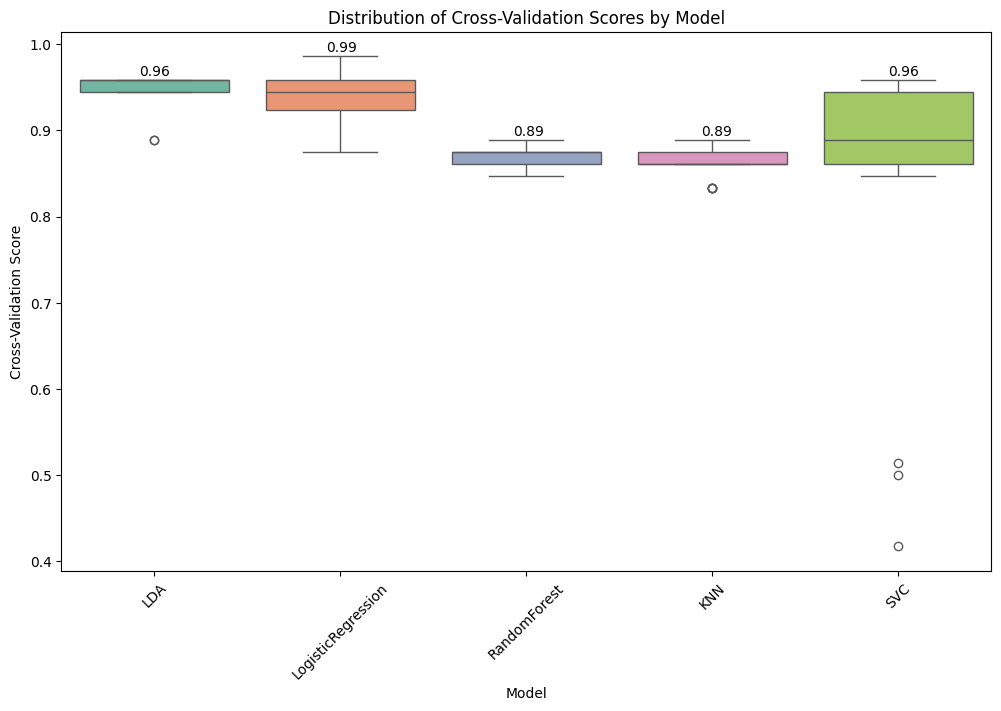

In [ ]:
import pandas as pd  # Import the pandas library for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns  # Import seaborn for advanced plotting

# Convert the results list into a DataFrame for easier manipulation and viewing
results_df = pd.DataFrame(results)
print(results_df)  # Print the DataFrame to view the results

# Initialize a dictionary to store cross-validation scores for each model
cross_val_scores = {}

# Iterate over the models and their corresponding RandomizedSearchCV objects
for name, model_data in best_models.items():
    search = model_data['search']  # Get the RandomizedSearchCV object
    scores = search.cv_results_['mean_test_score']  # Extract mean test scores
    cross_val_scores[name] = scores  # Store the scores in the dictionary

# Flatten the cross-validation scores dictionary into a DataFrame
scores_df = pd.DataFrame({
    'Model': [model for model, scores in cross_val_scores.items() for _ in scores],  # List of model names
    'Scores': [score for scores in cross_val_scores.values() for score in scores]  # List of scores
})

# Create a figure for the boxplot
plt.figure(figsize=(12, 7))  # Set the figure size
ax = sns.boxplot(data=scores_df, x='Model', y='Scores', palette='Set2')  # Create the boxplot with Seaborn

# Calculate and annotate the maximum scores for each model on the boxplot
max_scores = {model: max(scores) for model, scores in cross_val_scores.items()}  # Get maximum score for each model
for i, (model, max_score) in enumerate(max_scores.items()):  # Iterate over each model and its max score
    ax.annotate(f'{max_score:.2f}', xy=(i, max_score), xytext=(i, max_score + 0.02),  # Annotate max score
                textcoords='offset points', ha='center', va='bottom',  # Set text alignment
                fontsize=10, color='black')  # Set font size and color

# Add labels and title to the plot
plt.xlabel('Model')  # Label for the x-axis
plt.ylabel('Cross-Validation Score')  # Label for the y-axis
plt.title('Distribution of Cross-Validation Scores by Model')  # Title for the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()  # Display the plot